# Importing Libraries

In [ ]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
df=pd.read_csv('C:\\Users\\MAYBHOSA\\Downloads\\user-rate-cltv-price.csv')

In [41]:
df

,Unnamed: 0,user_id,rate,cltv,price
0,0,9794320,87.500000,710.08,3.170000
1,1,10280338,50.000000,3070.48,3.426875
2,2,15781728,100.000000,1137.36,10.155000
3,3,19762782,85.714286,4496.24,10.036250
4,4,28048440,84.615385,2765.28,3.292000
...,...,...,...,...,...
31100,31100,579903865,0.000000,472.08,8.430000
31101,31101,579906406,0.000000,542.08,4.840000
31102,31102,579916096,0.000000,527.52,2.355000
31103,31103,579925377,0.000000,2140.88,6.371667


In [42]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,user_id,rate,cltv,price
0,9794320,87.500000,710.08,3.170000
1,10280338,50.000000,3070.48,3.426875
2,15781728,100.000000,1137.36,10.155000
3,19762782,85.714286,4496.24,10.036250
4,28048440,84.615385,2765.28,3.292000
...,...,...,...,...
31100,579903865,0.000000,472.08,8.430000
31101,579906406,0.000000,542.08,4.840000
31102,579916096,0.000000,527.52,2.355000
31103,579925377,0.000000,2140.88,6.371667


In [43]:
values = (0,100)
final_output = df[df.isin(values)  == False]
final_output = final_output.dropna()
final_output

,user_id,rate,cltv,price
0,9794320,87.500000,710.08,3.170000
1,10280338,50.000000,3070.48,3.426875
3,19762782,85.714286,4496.24,10.036250
4,28048440,84.615385,2765.28,3.292000
5,36180886,66.666667,5021.52,4.075909
...,...,...,...,...
19598,579838202,75.000000,3221.12,7.190000
19600,579847583,50.000000,5145.28,5.404706
19601,579849574,50.000000,3236.24,2.889500
19602,579857098,83.333333,11642.96,4.331458


In [5]:
#scaler = MinMaxScaler()
#final_output[['user_id']]
#final_output

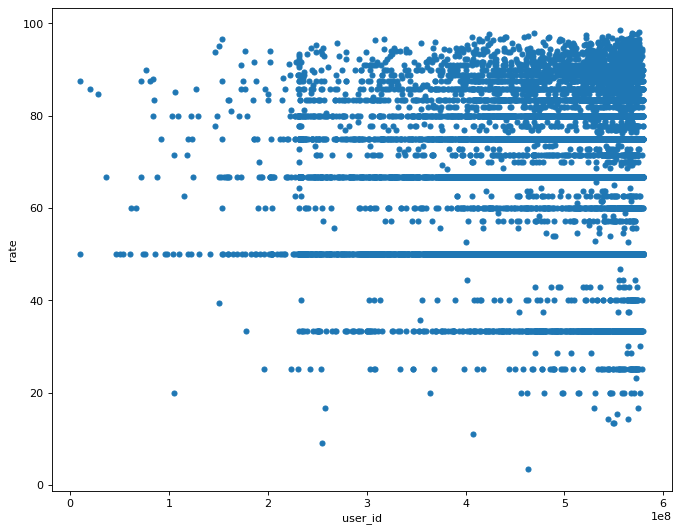

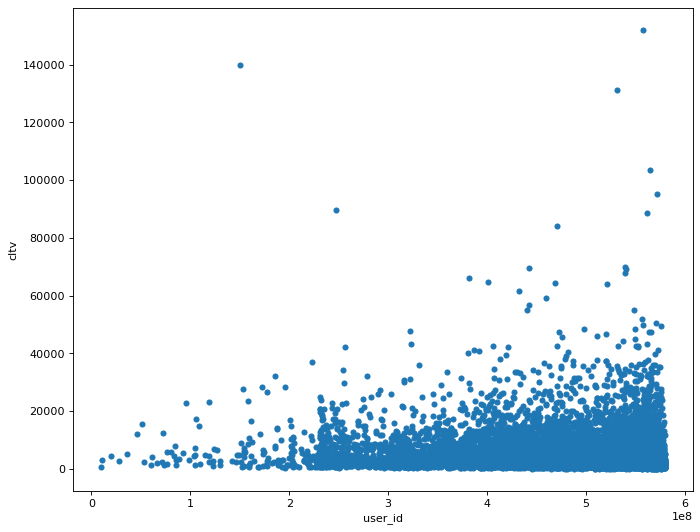

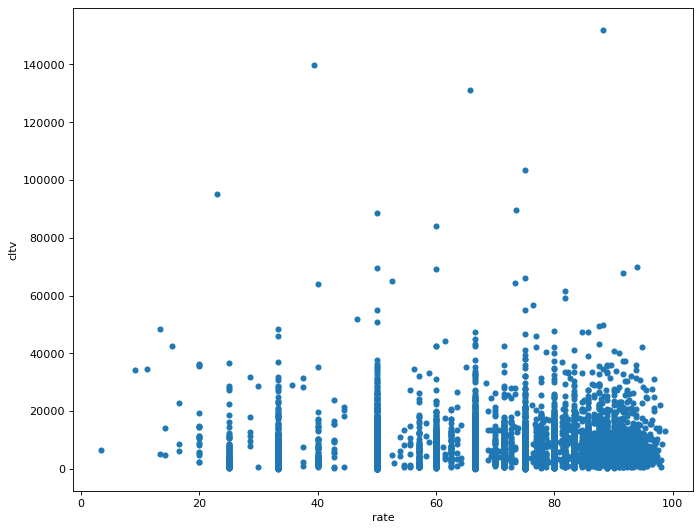

In [74]:
cols=final_output.columns
for i in range(0,10):
    for j in range(i+1,3):
            final_output.plot(kind='scatter',x=cols[i],y=cols[j])

In [51]:
#scaler = MinMaxScaler()
#final_output[['rate','user_id']] = scaler.fit_transform(final_output[['rate','user_id']])
#final_output

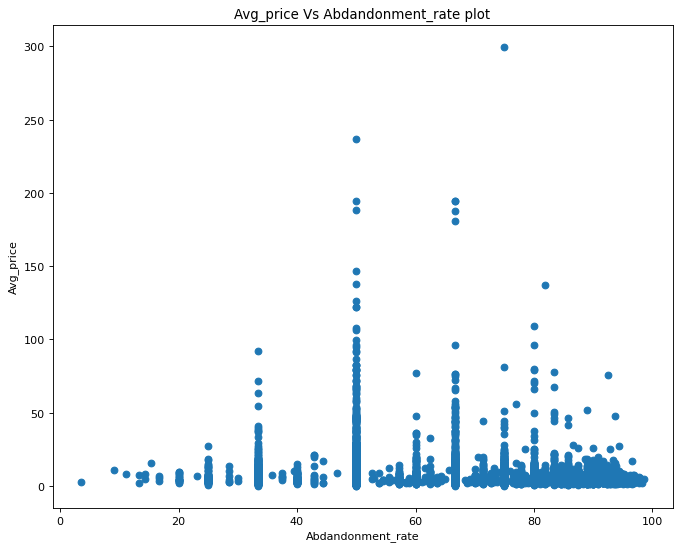

In [60]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':80})
plt.scatter(final_output['rate'],final_output['price'])
plt.title('Avg_price Vs Abdandonment_rate plot')
plt.xlabel('Abdandonment_rate')
plt.ylabel('Avg_price')
plt.show()

In [61]:
'''cols= final_output.columns
for i in range(0,3):
    for j in range(i+1,3):
            final_output.plot(kind='scatter',x=cols[i],y=cols[j])'''

"cols= final_output.columns\nfor i in range(0,3):\n    for j in range(i+1,3):\n            final_output.plot(kind='scatter',x=cols[i],y=cols[j])"

In [62]:
x = final_output[['rate','price']]
x

,rate,price
0,87.500000,3.170000
1,50.000000,3.426875
3,85.714286,10.036250
4,84.615385,3.292000
5,66.666667,4.075909
...,...,...
19598,75.000000,7.190000
19600,50.000000,5.404706
19601,50.000000,2.889500
19602,83.333333,4.331458


Text(0, 0.5, 'WCSS')

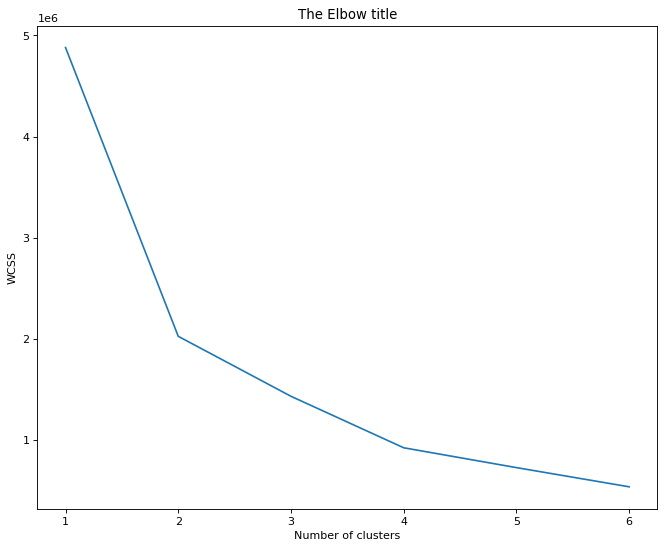

In [63]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [64]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
score = {}
K=range(2,10)

 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    pred = kmeanModel.fit_predict(x)
    
 
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    score[k] = metrics.silhouette_score(x,pred)
score

{2: 0.6157981690552903,
 3: 0.629723272821137,
 4: 0.5874519792895878,
 5: 0.6076881162338873,
 6: 0.6062970529511622,
 7: 0.5984031784577031,
 8: 0.6048135944742566,
 9: 0.5918965765039806}

In [65]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [66]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 1, ..., 0, 1, 1])

In [67]:
kmeans.cluster_centers_

array([[48.63568371,  6.00395576],
       [77.11398542,  4.87442483],
       [59.26049089, 69.02408854]])

Text(0, 0.5, 'Avg_Price')

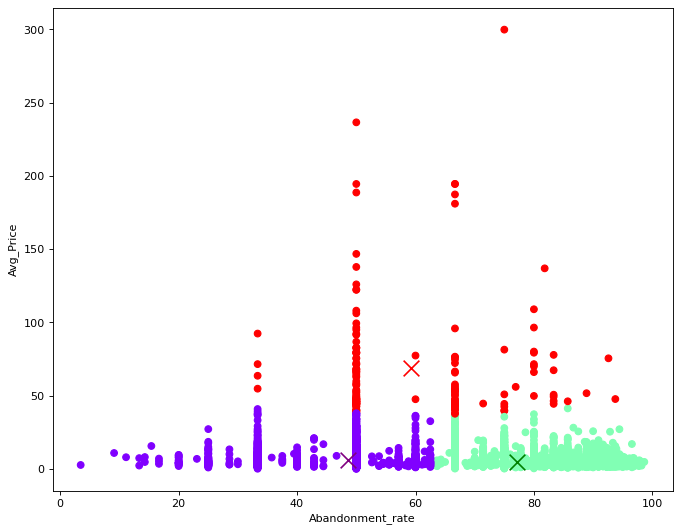

In [73]:
data_with_clusters = final_output.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['rate'],data_with_clusters['price'],c = data_with_clusters['Clusters'],cmap = 'rainbow')
plt.scatter(77.11398542, 4.87442483, s=200, c='g', marker='x')
plt.scatter(48.63568371, 6.00395576, s=200, c='purple', marker='x')
plt.scatter(59.26049089, 69.02408854, s=200, c='r', marker='x')
plt.xlabel('Abandonment_rate')
plt.ylabel('Avg_Price')